# Assi #2 NLP&FLP [TF-IDF]
## Silvana Yacoub 20201091
## Maher Mohsen 20200415
## S1

# Assi Points



 * 1\. Data
    * 1.1\. function to generate a document if it gets any phrase Generate more than one document in different fields.

 * 2\. Processing on data  
    * 2.1\. Cleaning data from each symbol or character doesn’t contain to the data.
    * 2.2\. Normalization: make all the data to lower case
    * 2.3\. Tokenization: split the data to words
    * 2.4\. Lemmatization or Stemming: return each word to origin.
    * 2.5\. Stop words: remove stop words from the data.

 * 3\. Unique words 
    * 3.1\. Get the unique words from the data.

 * 4\. TFIDF 
    * 4.1\. Get TF for each word for all documents.
    * 4.2\. Get IDF for each word.
    * 4.3\. Multiply TF * IDF
   * 4.4\. Get Normalized TFIDF

 * 5\. Bonus 
   * 5.1\. apply TFIDF from Scratch code and built in (sklearn) code with the same result

## 1. Data


### 1.1 function to generate a document if it gets any phrase Generate more than one document in different fields.

In [2]:
import random
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import genesis
from nltk.corpus import inaugural
from nltk.corpus import webtext
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re
from nltk.corpus import reuters
import pandas as pd
import numpy as np
from openai import OpenAI


In [21]:
import nltk
import random

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('words')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mezwm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mezwm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mezwm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\mezwm\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\mezwm\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\mezwm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users

In [23]:
from transformers import pipeline


In [25]:
generator = pipeline('text-generation', model='gpt2')

def generate_documents_gpt(topics):
    generated_docs = []
    for topic in topics:
        generated_docs.append(generator(topic, max_length=100)[0]['generated_text'])
    return generated_docs

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## 2. Processing on data

### 2.1 Cleaning data from each symbol or character doesn’t contain to the data.

In [33]:
def clean_data(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text

### 2.2 Normalization: make all the data to lower case

In [34]:
def normalize_text(text):
    normalized_text = text.lower()
    return normalized_text

### 2.3 Tokenization: split the data to words

In [35]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

### 2.4 Lemmatization or Stemming: return each word to origin.

In [36]:
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

### 2.5 Stop words: remove stop words from the data.

In [37]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

## 3. Unique words

### 3.1 Get the unique words from the data.

In [38]:
def get_unique_words(tokens):
    unique_words = set(tokens)
    return unique_words

## 4. TFIDF

### 4.1 TFIDF from scratch

In [39]:
import math
from collections import Counter

$$TF(t,d) = \frac{\text{number of times t appears in d}}{\text{total numbert of terms in d}}$$

In [109]:

def compute_term_frequencies(documents):
    

    term_frequencies = []
    for i in range(len(documents)):
        
        word_counts = Counter(documents[i])
        total_words = len(documents[i])
        term_frequency = {word: count / total_words for word, count in word_counts.items()}
        term_frequencies.append(term_frequency)
    return term_frequencies



$$idf(t) = \log{\frac{1+n}{1+df(t)}}+1$$

In [41]:
def compute_inverse_document_frequencies(documents):
    total_docs = len(documents)
    inverse_document_frequencies = {}
    for doc in documents:
        for word in set(doc):
            inverse_document_frequencies[word] = inverse_document_frequencies.get(word, 0)

    inverse_document_frequencies = {word: math.log(((total_docs + 1) / (count + 1)) + 1) for word, count in inverse_document_frequencies.items()}
    return inverse_document_frequencies



$$TF-IDF = TF * IDF$$

In [111]:
def compute_tf_idf(documents):

    term_frequencies = compute_term_frequencies(documents)
    inverse_document_frequencies = compute_inverse_document_frequencies(documents)
    tf_idf_scores = []
    for doc_tf in term_frequencies:
        doc_tf_idf = {word: tf_val * inverse_document_frequencies[word] for word, tf_val in doc_tf.items()}
        tf_idf_scores.append(doc_tf_idf)

    return tf_idf_scores



$$NormalizedTF-IDF = \frac{X}{||\mathbf{X}||}_2$$

In [43]:
def normalize_tfidf_scores(tfidf_scores):
    normalized_tfidf_scores = []
    for doc in tfidf_scores:
        norm = np.linalg.norm(list(doc.values()))
        normalized_doc = {word: tfidf_val / norm for word, tfidf_val in doc.items()}
        normalized_tfidf_scores.append(normalized_doc)

    return normalized_tfidf_scores

In [44]:
def to_dataframe(docs,tfidf_matrix,vectorizer):
    return pd.DataFrame(
        tfidf_matrix.T.toarray(),
        index=vectorizer.get_feature_names_out(),
        columns= [f"Doc {i+1}" for i in range(len(docs))],
    )

### 4.2 TFIDF with Sklearn

In [115]:
def calculate_tfidf(documents):
    flattened_documents = [' '.join(doc) for doc in documents]

    vectorizer = TfidfVectorizer()

    tfidf_matrix = vectorizer.fit_transform(flattened_documents)

    return tfidf_matrix, vectorizer

# Workspace

In [120]:
prompt = ["",""]
prompt[0] = input("Please Enter Topic 1")
prompt[1] = input("Please Enter Topic 2")

In [121]:
docs = generate_documents_gpt(prompt)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [122]:
docs

['A star search through some of the sites and to date the site has been "surveys, which we have gathered from those who have had to go through that process of coming up with the data. It\'s a challenge as well."\n\nThe data was compiled from social network searches and news related to the events of Sept. 11, 2001, that claimed the lives of 9/11 hijackers David and Asif, four other Americans.\n\nThe data, collected in 2006 by the',
 'dfs search for them. While this only looks at the most recent, the latest search data from Twitter gives a pretty clear look at when the search engines were first started. With an average search-time of 18 seconds, this one has a pretty significant trend going back decades.\n\nThis is quite important because when Google first started using S3 in 2006, it was the first time anyone had to search for keywords such as "pizza," "chocolate" or "mild" (']

In [123]:
for i in range(len(docs)):
    docs[i] = remove_stopwords(lemmatize_text(tokenize_text(normalize_text(clean_data(docs[i])))))

In [124]:
doc_1_unique = get_unique_words(docs[0])
doc_2_unique = get_unique_words(docs[1])

In [125]:
print(doc_1_unique)

{'wa', 'gathered', 'go', 'date', 'hijacker', 'compiled', 'challenge', 'event', 'sept', 'data', 'ha', 'process', 'star', 'survey', 'related', 'well', 'site', 'asif', 'life', 'claimed', 'four', 'coming', 'network', 'search', 'news', 'david', 'collected', 'american', 'social'}


In [126]:
print(doc_2_unique)

{'recent', 'first', 'back', 'wa', 'average', 'significant', 'look', 'twitter', 'give', 'pretty', 'important', 'data', 'ha', 'quite', 'google', 'anyone', 'going', 'engine', 'chocolate', 'trend', 'mild', 'dfs', 'pizza', 'clear', 'search', 'keywords', 'second', 'decade', 'one', 'latest', 'started', 'using', 'time'}


In [127]:
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

In [128]:
docs

['star search site date site ha survey gathered go process coming data challenge well data wa compiled social network search news related event sept claimed life hijacker david asif four american data collected',
 'dfs search look recent latest search data twitter give pretty clear look search engine first started average search time second one ha pretty significant trend going back decade quite important google first started using wa first time anyone search keywords pizza chocolate mild']

In [129]:
for i in range(len(docs)):
    docs[i] = nltk.word_tokenize(docs[i].lower())

In [130]:
tfidf_matrix,vectorizer = calculate_tfidf(docs)

In [131]:
df = to_dataframe(docs,tfidf_matrix,vectorizer)

In [132]:
tfidf = compute_tf_idf(docs)
normalized_tfidf = normalize_tfidf_scores(tfidf)


## 5. Bonus

In [133]:
for idx, doc_tfidf in enumerate(normalized_tfidf):
    print(f"TF-IDF for document {idx + 1}:")
    for key, value in doc_tfidf.items():
        if(len(key) > 1):
            print(f"({key})  Scratch : {round(value, 2)}, built-in : {round(df[f'Doc {idx+1}'][key],2)}")

TF-IDF for document 1:
(star)  Scratch : 0.15, built-in : 0.17
(search)  Scratch : 0.3, built-in : 0.24
(site)  Scratch : 0.3, built-in : 0.34
(date)  Scratch : 0.15, built-in : 0.17
(ha)  Scratch : 0.15, built-in : 0.12
(survey)  Scratch : 0.15, built-in : 0.17
(gathered)  Scratch : 0.15, built-in : 0.17
(go)  Scratch : 0.15, built-in : 0.17
(process)  Scratch : 0.15, built-in : 0.17
(coming)  Scratch : 0.15, built-in : 0.17
(data)  Scratch : 0.46, built-in : 0.36
(challenge)  Scratch : 0.15, built-in : 0.17
(well)  Scratch : 0.15, built-in : 0.17
(wa)  Scratch : 0.15, built-in : 0.12
(compiled)  Scratch : 0.15, built-in : 0.17
(social)  Scratch : 0.15, built-in : 0.17
(network)  Scratch : 0.15, built-in : 0.17
(news)  Scratch : 0.15, built-in : 0.17
(related)  Scratch : 0.15, built-in : 0.17
(event)  Scratch : 0.15, built-in : 0.17
(sept)  Scratch : 0.15, built-in : 0.17
(claimed)  Scratch : 0.15, built-in : 0.17
(life)  Scratch : 0.15, built-in : 0.17
(hijacker)  Scratch : 0.15, bui

In [134]:
import matplotlib.pyplot as plt

In [135]:
def plot_tfidf_values(tfidf_matrix, feature_names):
    # Calculate the mean TF-IDF value for each feature (word)
    tfidf_means = np.mean(tfidf_matrix, axis=0).tolist()[0]

    # Pair feature names with their mean TF-IDF values
    features_with_tfidf = list(zip(feature_names, tfidf_means))

    # Sort features by their TF-IDF values
    features_with_tfidf.sort(key=lambda x: x[1], reverse=True)

    # Extract sorted feature names and TF-IDF values
    sorted_features = [feature[0] for feature in features_with_tfidf]
    sorted_tfidf_values = [feature[1] for feature in features_with_tfidf]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features[:10], sorted_tfidf_values[:10], color='skyblue')
    plt.xlabel('TF-IDF Value')
    plt.title('Top 10 Words by TF-IDF Value')
    plt.gca().invert_yaxis()
    plt.show()

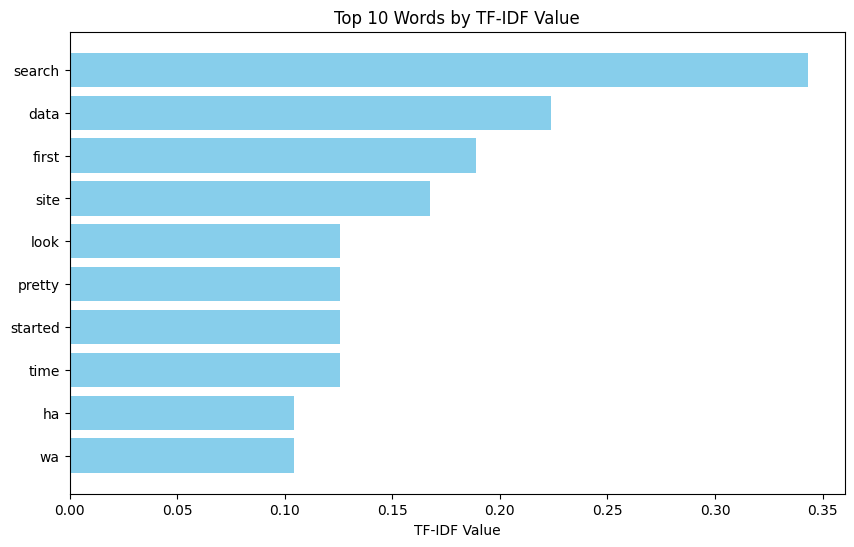

In [136]:
plot_tfidf_values(tfidf_matrix, vectorizer.get_feature_names_out())